In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

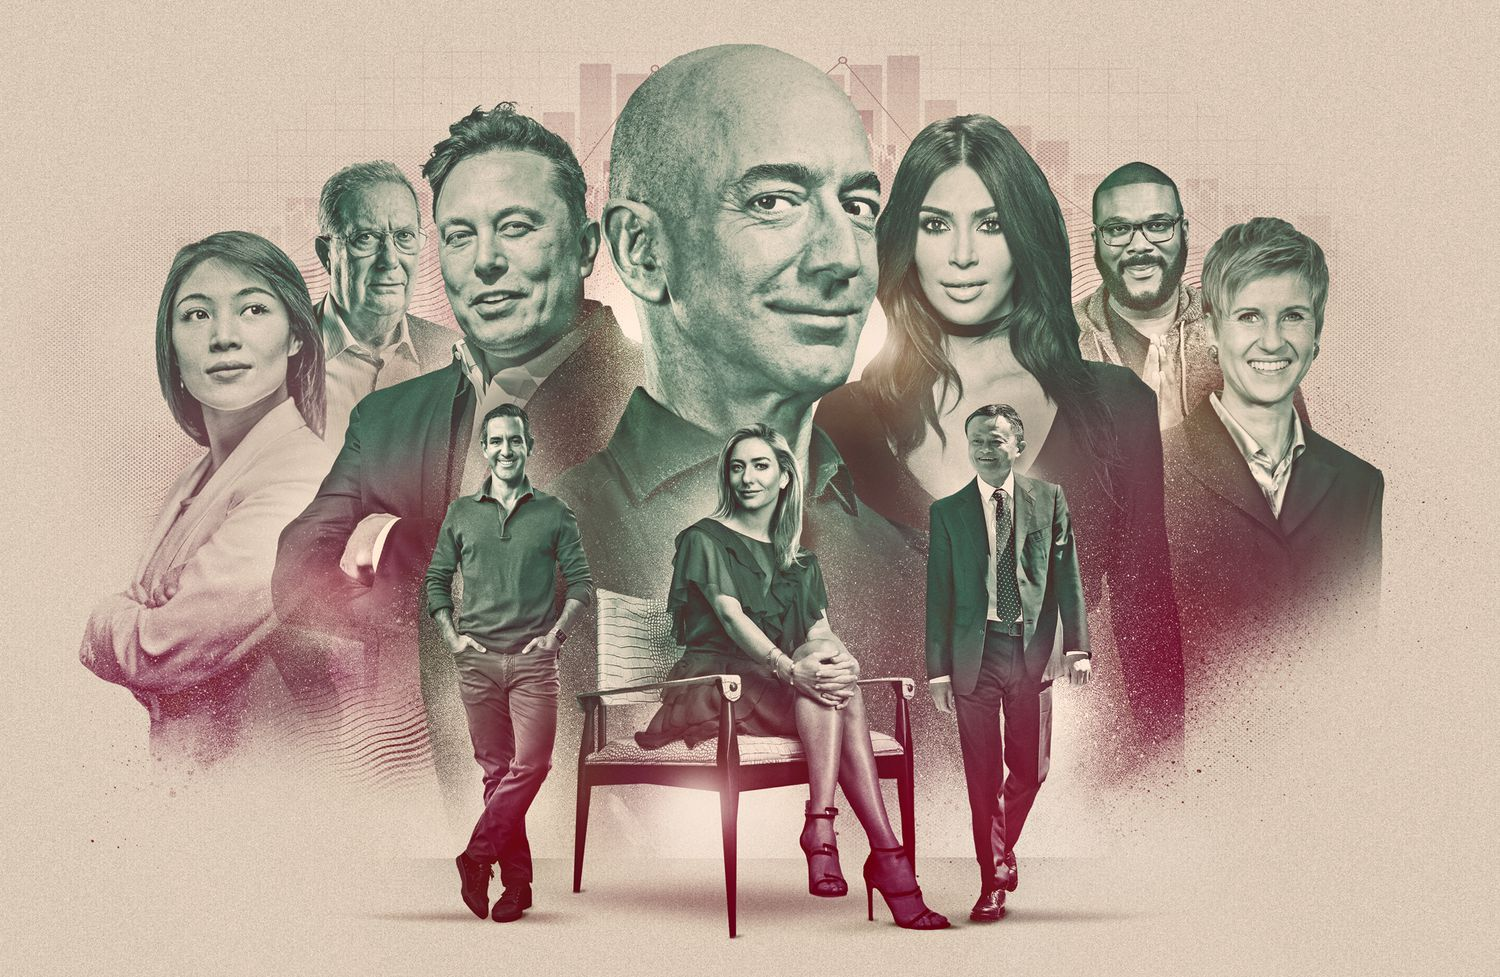

It’s been a year like no other, and we aren’t talking about the pandemic. There were rapid-fire public offerings, surging cryptocurrencies and skyrocketing stock prices. The number of billionaires on Forbes’ 35th annual list of the world’s wealthiest exploded to an unprecedented 2,755--660 more than a year ago. Of those, a record high 493 were new to the list--roughly one every 17 hours, including 210 from China and Hong Kong. Another 250 who’d fallen off in the past came roaring back. A staggering 86% are richer than a year ago.

CONTENTS:

-basic conversions of texts and datatypes

-plotly barcharts

-converting groupby values to dataframes

-converting value_count values to dataframes

-wordclouds

-treemaps

-piecharts

-conclusions


In [ ]:
pip install chart_studio

In [ ]:
#importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings("ignore")


In [ ]:
#loading dataset
df= pd.read_csv("../input/forbes-billionaires-of-2021/Billionaire.csv")

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

No null values in the dataset

In [ ]:
df.shape

There are 2755 records(Billionaires in the dataset)

In [ ]:
#Converting the networth column for proper datatype and values

In [ ]:
#Replacing/removing the $ sign from the column networth
df["NetWorth"]= df.NetWorth.apply(lambda x:str(x).replace("$",""))

In [ ]:
#similarly replacing the "B"
df["NetWorth"]= df.NetWorth.apply(lambda x:str(x).replace("B",""))

In [ ]:
#Removing the extra space in the values
df["NetWorth"]= df.NetWorth.apply(lambda x:str(x).replace(" ",""))

In [ ]:
#Converting the networth column to float
df["NetWorth"]= df.NetWorth.apply(lambda x:float(x))

EDA

In [ ]:
#Total value of Net worth of all billionaires
df.NetWorth.sum()

The total value of billionaires combined is over 13 Trillion dollars

In [ ]:
#Top 20 Billionaires
x= df.groupby("Name").NetWorth.sum().sort_values(ascending= False).head(20)
x

In [ ]:
dx= df[df["Rank"]<20]
ax= px.bar(dx,x= "NetWorth",y= "Name",color= "NetWorth",labels= {"NetWorth":"Networth(in Billions)"},template= "plotly_dark")
ax.show()

Jeff Bezos is the richest person on the planet with a total networth of 177Billion 
Followed by Elon Musk
Other notable mentions are Mark Zuckerberg,Bill Gates,Mukesh Ambani,Larry Page,etc

In [ ]:
#Word cloud representing the top 100 billionaires
from wordcloud import WordCloud, STOPWORDS
dx= df[df["Rank"]<100]
plt.figure(figsize= (20,20))
words= " ".join(dx["Name"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   

In [ ]:
#Countries with most contribution to the total value.
x= df.groupby("Country").NetWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()
ax= px.bar(x,x= "NetWorth",y= "Country",color= "NetWorth",labels= {"NetWorth":"Total value(in Billions)"},template= "plotly_dark")
ax.show()

USA and China contribute most to the total values of billionaires followed by Germany and India


In [ ]:
#Word cloud representing the top Countries
plt.figure(figsize= (20,20))
x= df
x["Country"]= x.Country.apply(lambda x: str(x).replace(" ",""))
words=str(x["Country"].unique())
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   

In [ ]:
#Countries with least contribution to the total value.
x= df.groupby("Country").NetWorth.sum().sort_values(ascending= False).tail(10)
x

In [ ]:
#Countries with most number of Billionaires(top 20)
x= pd.DataFrame(df.Country.value_counts().head(20).reset_index().values, columns=["Country", "No of Billionaires"])
x["No of Billionaires"]=x["No of Billionaires"].apply(lambda x: int(x))
ax= px.bar(x,x= "No of Billionaires",y= "Country",color= "No of Billionaires",template= "plotly_dark")
ax.show()

The USA has produced most number of 724 Billionaires out of 2755  followed by China(626 Billionaires)
India ranks 3rd with a major difference from the first 2 countries number

In [ ]:
#Countries with least number of Billionaires
df.Country.value_counts().tail(20)

In [ ]:
#Tree map representing most number of Billionaires
ax= px.treemap(df,path=["Country"],template= "plotly_dark")
ax.show()

In [ ]:
#Top sources of Billionaires

In [ ]:
#Word cloud representing the top Sources
plt.figure(figsize= (20,20))
words= " ".join(df["Source"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   

In [ ]:
df.groupby("Source").NetWorth.sum().sort_values(ascending= False).head(20)

In [ ]:
#Top sources of Billionaires
x= df.groupby("Source").NetWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()
ax= px.bar(x,x= "NetWorth",y= "Source",color= "NetWorth",labels= {"NetWorth":"Total value(in Billions)"},template= "plotly_dark")
ax.show()

The real estate source contributes the most values with a total of 686 Billions followed by diverified and investments
Other notable sources are Amazon(230Billion) ,Google(216Billion),Microsoft(197Billion),etc

In [ ]:
#Sources producing least value
df.groupby("Source").NetWorth.sum().sort_values(ascending= False).tail(20)

In [ ]:
#Tree map representing count of billionaires per source
ax= px.treemap(df,path=["Source"],template= "plotly_dark")
ax.show()

In [ ]:
#Further analysis on Indian Billionaires

In [ ]:
#creating separate dataframe for India
x= df[df["Country"]=="India"]

In [ ]:
len(x)

There are 140 Billionaires in India out of 2755 total

In [ ]:
x.NetWorth.sum()

596.4 Billion is the overall networth of Indian Billionaires

In [ ]:
#Top 20 Billionaires in India
x.groupby("Name").NetWorth.sum().sort_values(ascending= False).head(20)

Mukesh Ambani is the richest person in India followed by Gautam Adani and Shiv Nadar

In [ ]:
dx= x.groupby("Name").NetWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()

In [ ]:
#Pie chart representation of Indian Billionaires(top 20)
ax= px.pie(dx,names="Name",values= "NetWorth" )
ax.show()

In [ ]:
#Tree map representing of Top sources in India
ax= px.treemap(x,path=["Source"],template= "plotly_dark")
ax.show()

In [ ]:
#Top 10 sources in India
x.Source.value_counts().head(10)

In [ ]:
#Word cloud representing of sources in India
plt.figure(figsize= (20,20))
words= " ".join(x["Source"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   

Final Conclusions:

-2755 number of billionaires with 13 trillion dollars of net worth

-Jeff Bezos and Elon Musk are richest on the planet

-USA and China produce most number of billionaires and also total values

-USA alone has 724 Billionaires contributing more than 4 Trillion dollars of networth

-Real Estate and diversified sources contribute to the highest value of in terms of sources followed by Investments

-140 Billionaires in India

-Mukesh Ambani richest in India(84.5 Billion dollars)

-pharmaceuticals and consumer goods are the top sources in India

